# Bike sharing case study
## Problem Statement
Understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

## Steps 
To understand the problem and propose a solution and sugestions to the bike sharing company post covid restrictions are removed we will be going through following steps on the given data.
1. Reading, Understandting, cleaning and visualizing the data
2. Preparing the data for modelling
    - Train - Test split
    - Rescaling
3. Training the model
    - RSE method
    - Manual elimenation of features
4. Resudaual analysis
5. Prediction and evaluation on the test set
6. Conclusion and suggestions

## Step 1: Reading, Understandting, cleaning and visualizing the data

### Reading

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

In [2]:
bs = pd.read_csv("day.csv")
bs.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### Understanding

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [3]:
bs.shape

(730, 16)

In [4]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bs.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

No null values need to clean up some of the coloumsn
- Drop instant coloumn we will not be needing index
- Convert dteday coloumn to time format
- All the min and max value look consistent with the coloum descriptions.

### Cleaning

In [6]:
bs = bs.drop('instant', axis=1)

In [7]:
bs['dteday']= pd.to_datetime(bs['dteday'])
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.7 KB


In [8]:
bs['dteday'].duplicated().any()

False

No duplicate dates good no need to eliminate any rows here

In [9]:
for c in bs.columns:
    print (f"---- {c} ---")
    print(bs[c].value_counts())

---- dteday ---
2018-01-01    1
2019-04-25    1
2019-04-27    1
2019-04-28    1
2019-04-29    1
             ..
2018-03-09    1
2018-04-09    1
2018-05-09    1
2018-06-09    1
2019-12-31    1
Name: dteday, Length: 730, dtype: int64
---- season ---
3    188
2    184
1    180
4    178
Name: season, dtype: int64
---- yr ---
0    365
1    365
Name: yr, dtype: int64
---- mnth ---
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
---- holiday ---
0    709
1     21
Name: holiday, dtype: int64
---- weekday ---
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
---- workingday ---
1    499
0    231
Name: workingday, dtype: int64
---- weathersit ---
1    463
2    246
3     21
Name: weathersit, dtype: int64
---- temp ---
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.84915

For sanity check lets check if `casual` + `registered` = `cnt`

In [10]:
bs.apply(lambda x: (x['casual'] + x['registered'] == x['cnt']), axis=1).value_counts()

True    730
dtype: int64

Looks like the rows coustomer count is valid, Total count is equal to `casual` riders plus `registered`

### Visualizing

Lets start visalizing data, One of the first thing we want to visualize is data spread, how much of outliers are present. This gives us idea on how predictable or model would be.
* Models are better when there are few outliners. 
* We also want to find if there is any liner relation between `cnt` and other variables.

In the data given, `casual` and `registered` will add to `cnt`, When building model we need to figure out if we need all 3 of them.


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.plotting.backend = "plotly"
import seaborn as sns

Lets plot the total usage day by day and also lets plot registerd and casual users also

In [12]:
bs = bs.sort_values(['dteday','mnth'])

In [13]:
bs.plot.line(x='dteday', y='cnt')

<div class="alert alert-block alert-info">
<b>Observation:</b> Looks like bike sharing has a uptick in coustomers in 2019. Some thing changed in January that caused a uptick in number of coustomers for bike sharing 
</div>

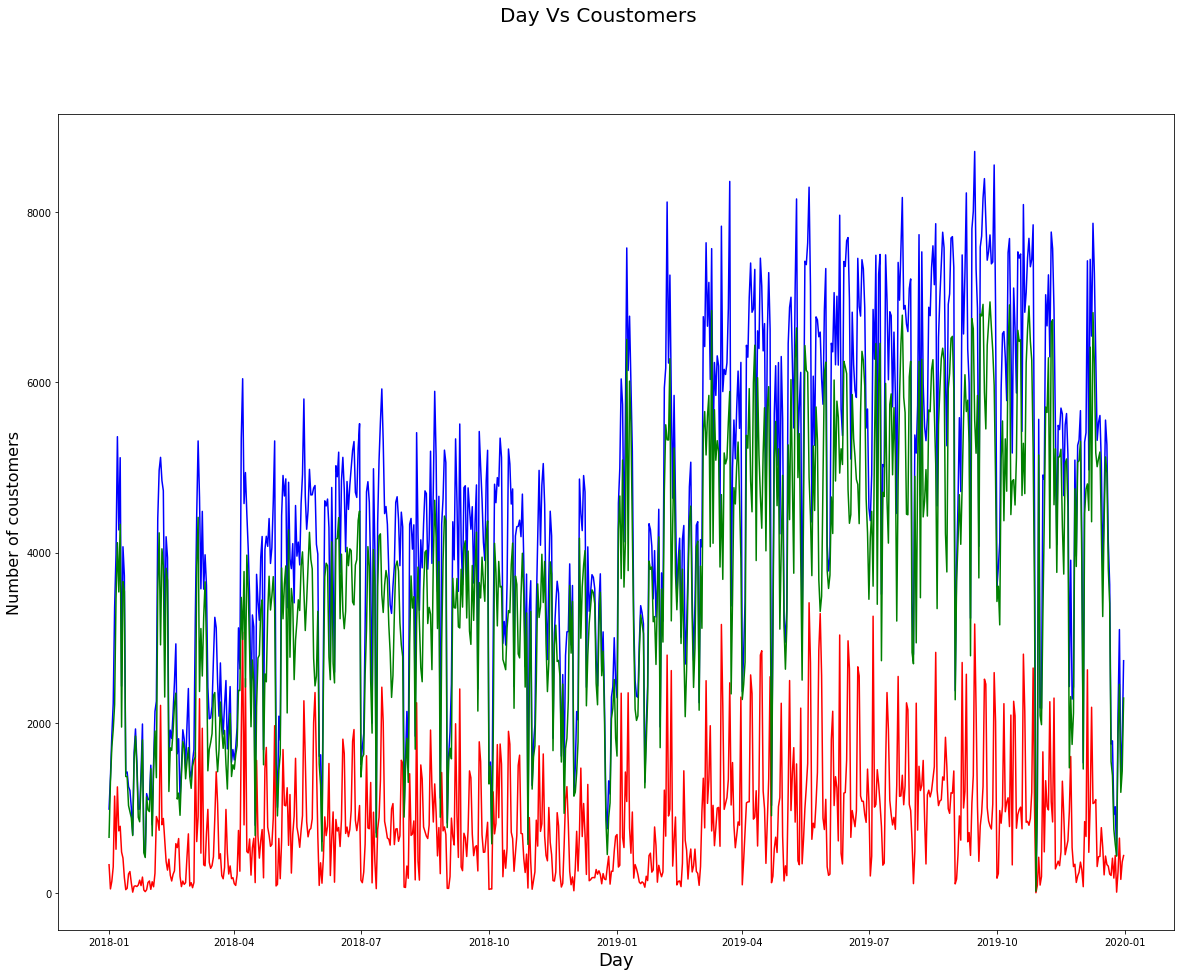

In [14]:
fig = plt.figure(figsize=(20,15))
plt.plot(bs.dteday,bs.cnt, color="blue")
plt.plot(bs.dteday,bs.casual, color="red")
plt.plot(bs.dteday,bs.registered, color="green")
fig.suptitle('Day Vs Coustomers', fontsize=20)              # Plot heading 
plt.xlabel('Day', fontsize=18)                               # X-label
plt.ylabel('Number of coustomers', fontsize=16)
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> Uptick in 2019 is mostly due to increased in registerd coustomers. Marketting team might want to focus on changes that where done in 2019 January, and keep doing things simillar to that.
</div>

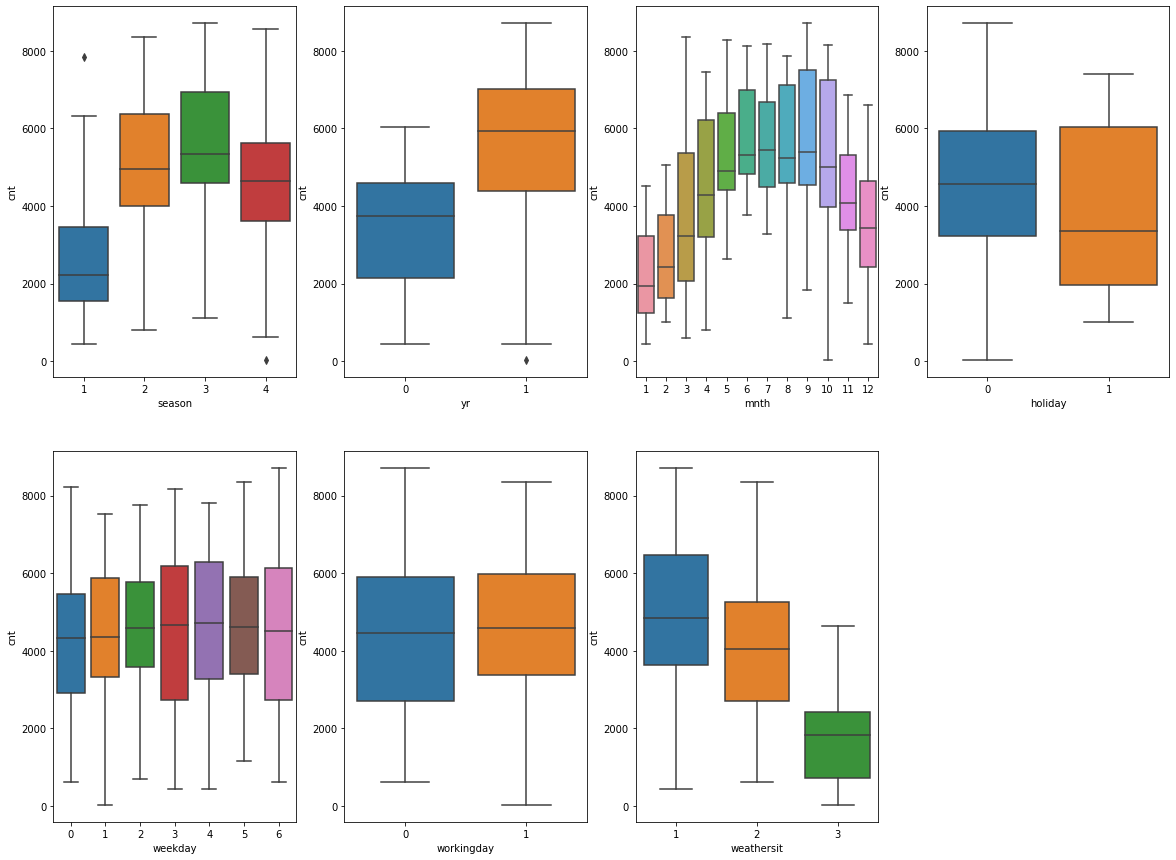

In [15]:
plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y='cnt', data=bs)

plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y='cnt', data=bs)

plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y='cnt', data=bs)

plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y='cnt', data=bs)

plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y='cnt', data=bs)

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y='cnt', data=bs)

plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y='cnt', data=bs)

plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 
    There are few observations from above graphs
    
    1. Season 1, spring has negative effect on bike sharing usage.
    2. Bike sharing has drastic uptic in 2019.
    3. Holiday has minimul effect on daily coustomer count.
    4. Weekday and working day also has minimul effect.
    5. Snow has very drastic effect on bike sharing usage.
</div>

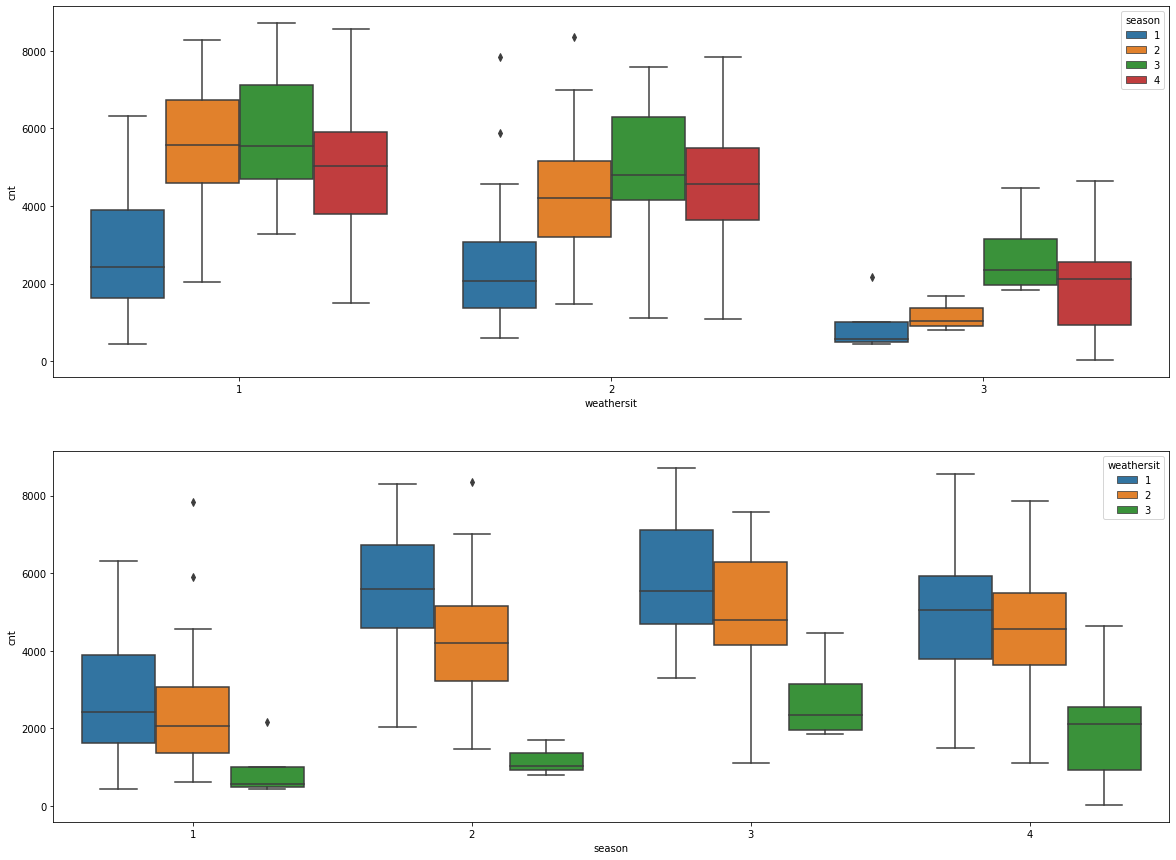

In [16]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.boxplot(x = 'weathersit', y='cnt', data=bs, hue='season')

plt.subplot(2,1,2)
sns.boxplot(x = 'season', y='cnt', data=bs, hue='weathersit')
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 
    There are two major observations from above graphs
    
    1. Season 1, spring has negative effect on bike sharing usage, irrespective of the weather.
    2. Snow has a negative effect on bike sharing irrespective of the season.

    Conclusion here irespective of seasons and weather, Snow and Spring has negative effect.
</div>

Let's get the corelation map and corelation values to see if linear regression model can be used for this data

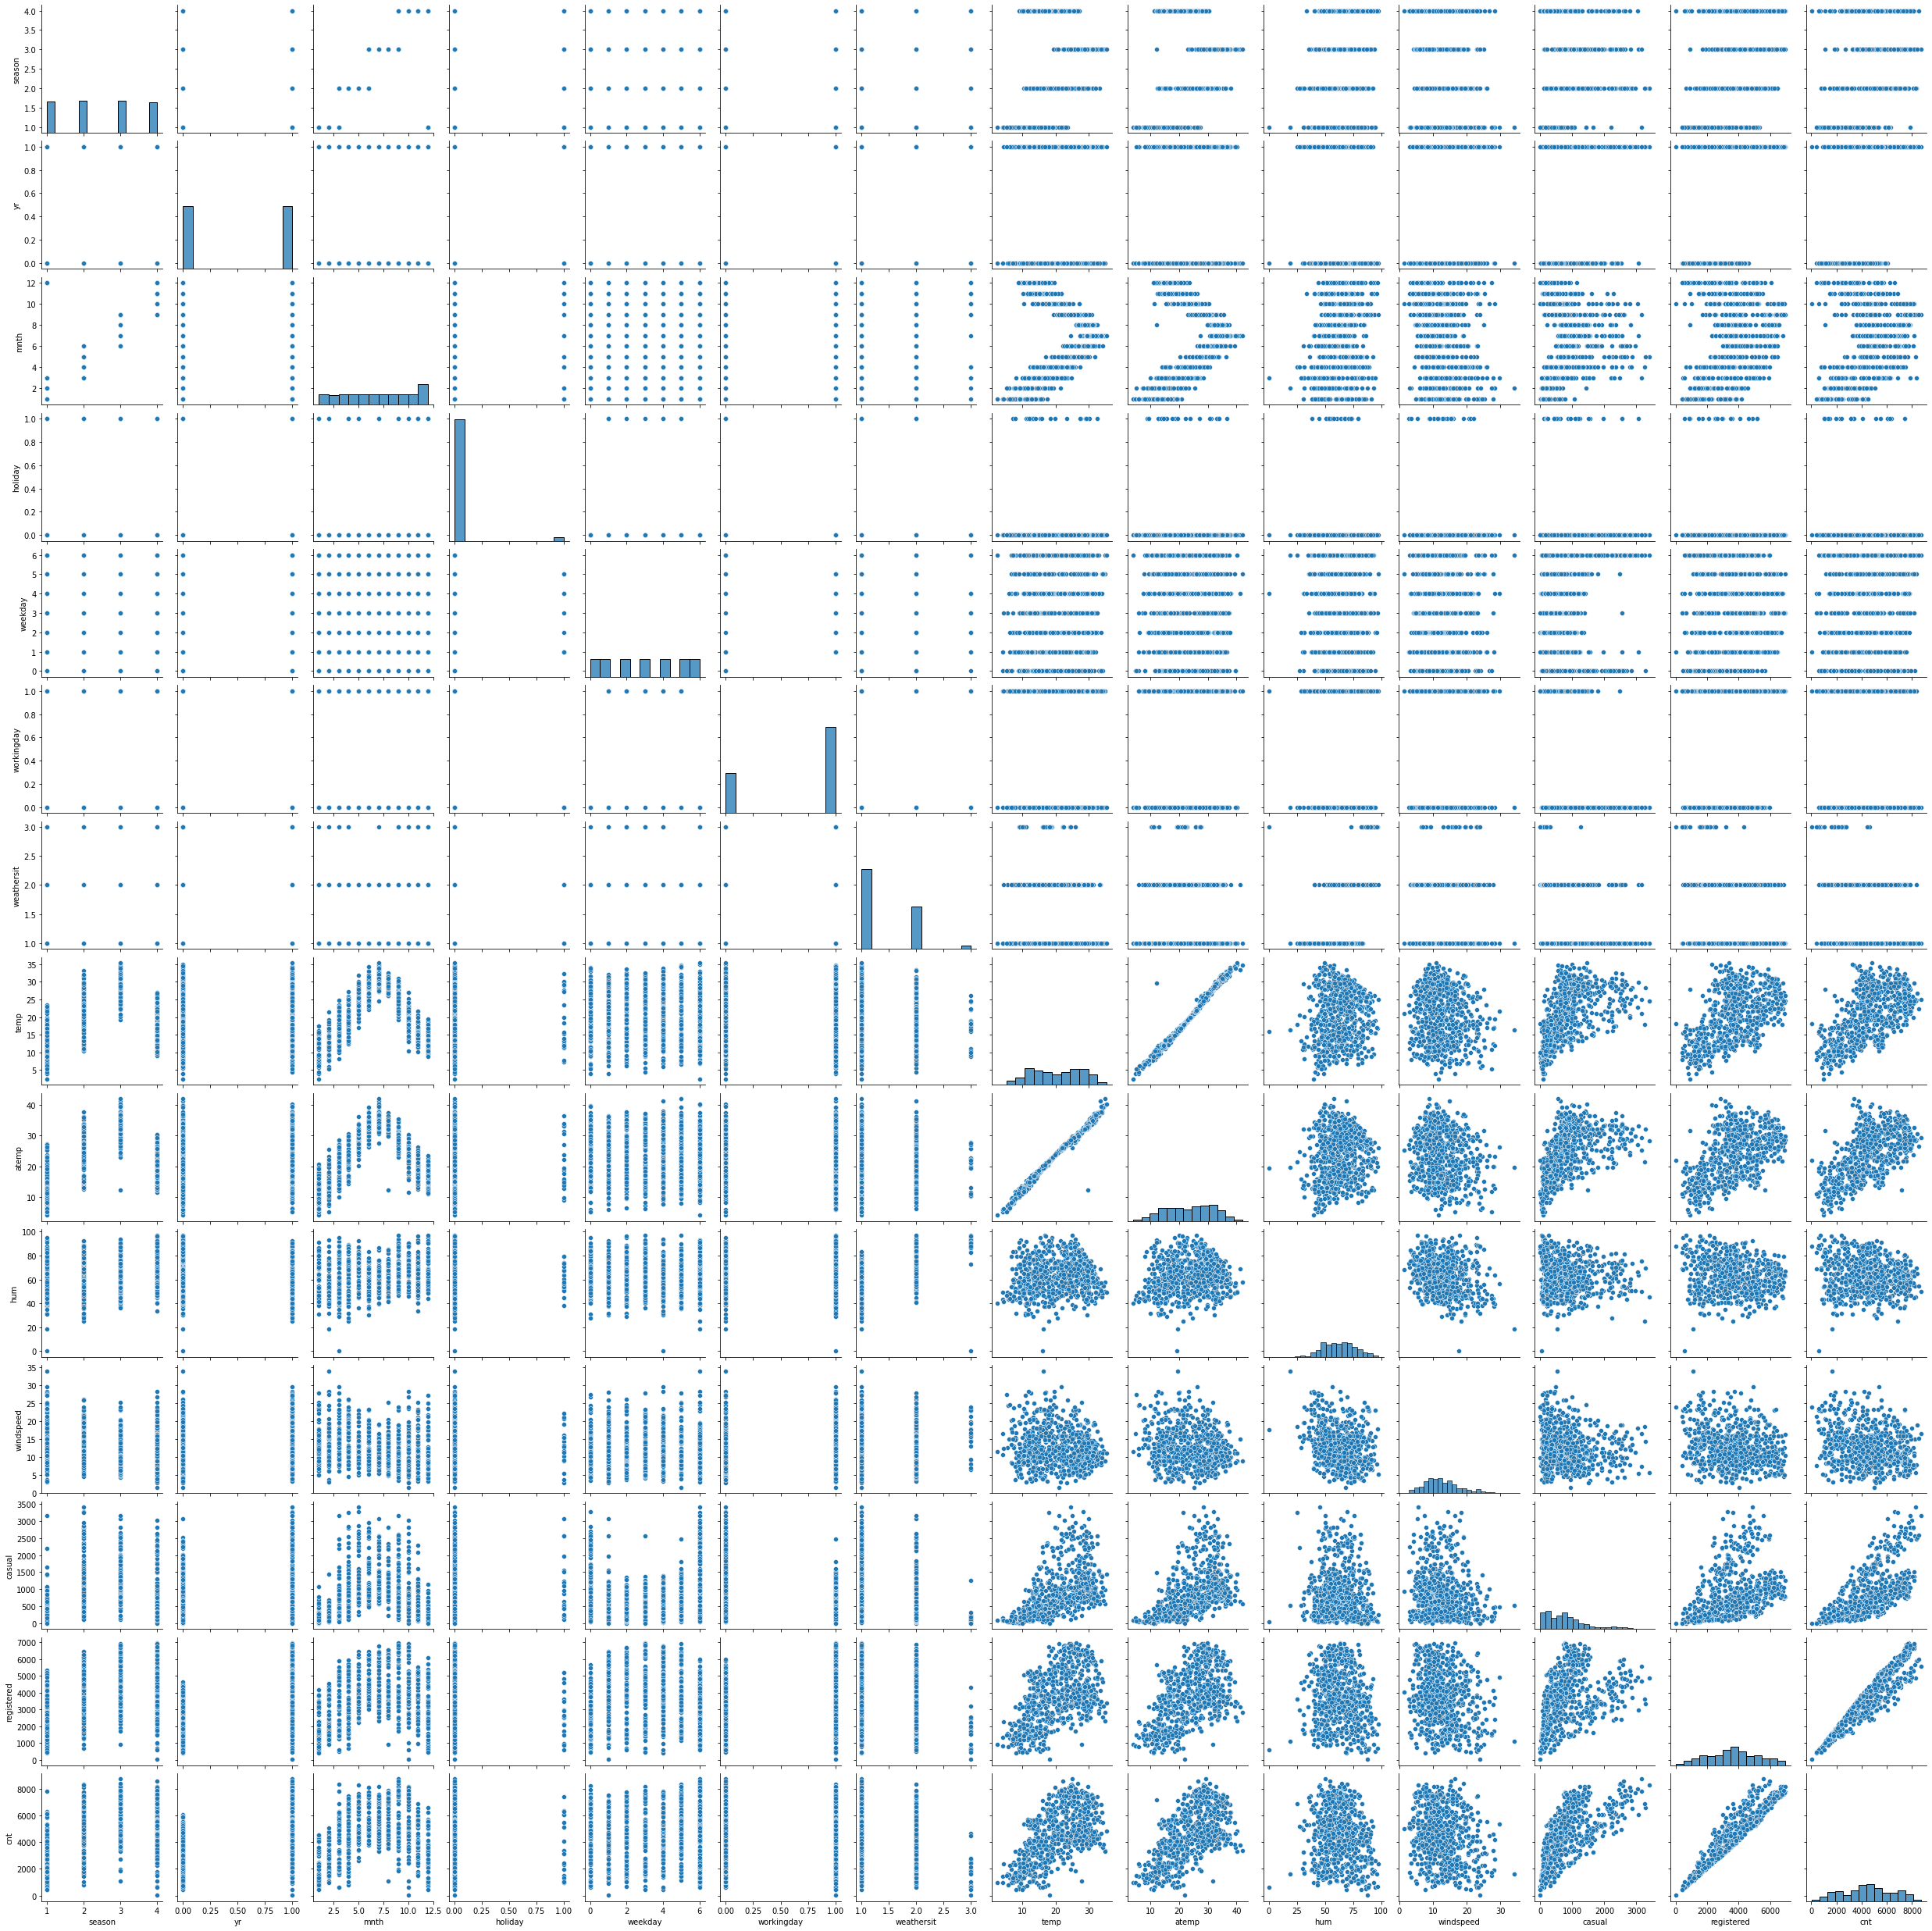

In [17]:
sns.pairplot(data=bs)
plt.show()

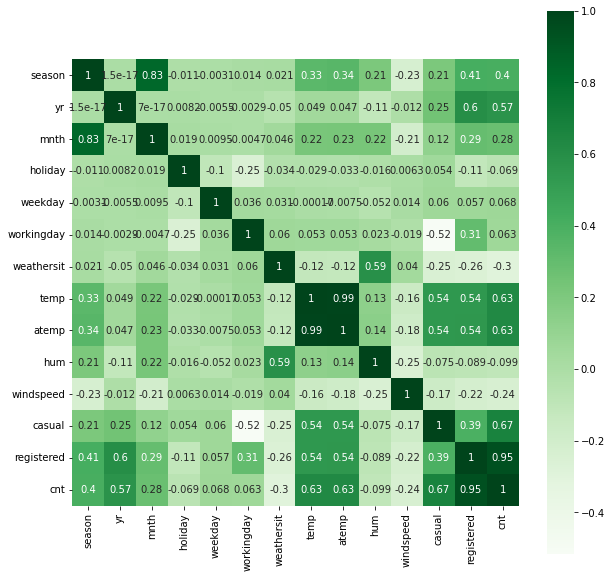

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(bs.corr(), annot = True, cmap="Greens", square= True)
plt.show()

In [19]:
bs.corr()['cnt'].abs().sort_values(ascending=False)

cnt           1.000000
registered    0.945411
casual        0.672123
atemp         0.630685
temp          0.627044
yr            0.569728
season        0.404584
weathersit    0.295929
mnth          0.278191
windspeed     0.235132
hum           0.098543
holiday       0.068764
weekday       0.067534
workingday    0.062542
Name: cnt, dtype: float64

<div class="alert alert-block alert-info">
<b>Observation:</b> 

    `cnt` is highly correlated to `registered` and `casual` which makes sense, `cnt` = `registered` + `casual`
    `atemp` and `temp` are highly dependent on the bike sharing. Understandable, based on temperature customers are deciding weather to use bike sharing or not.
    `season` and `weathersit` are also corellated to `cnt` as we saw `spring` and `snow` have high effect on coustomer use of bike sharing.
    
    
    60% of weather can be explained by humidity. 
    temp and atemp are highly corelated we might not need both the variables.
    temp and atemp are also 30% corelated with season
    
    
    Let's create new coloum with % of registerd coustomers and see the the corelation.
    We can drop year from hear and fowrd, We already determined 2019 has better perfermence then 2018
    We can also drop `temp` and keep `atemp`
    Will create 2 new colums, month end last 7 days of month, Month start first 7 days of month and drop `dteday`
</div>

In [20]:
bs = bs.drop(['temp', 'yr'], axis=1)
bs.head()

dteday  season  mnth  holiday  weekday  workingday  weathersit  \
0   2018-01-01       1     1        0        6           0           2   
31  2018-01-02       1     2        0        2           1           2   
59  2018-01-03       1     3        0        2           1           1   
90  2018-01-04       2     4        0        5           1           2   
120 2018-01-05       2     5        0        0           0           2   

        atemp      hum  windspeed  casual  registered   cnt  
0    18.18125  80.5833  10.749882     331         654   985  
31   11.72650  82.9565   3.565271      47        1313  1360  
59   13.19395  53.5000  14.500475     137        1714  1851  
90   14.17270  68.6250  17.333436     307        1920  2227  
120  22.41020  76.2083   7.125718    1138        2213  3351

In [21]:
bs['registered_pct'] = (bs['registered']/bs['cnt']) *100
bs.head()

dteday  season  mnth  holiday  weekday  workingday  weathersit  \
0   2018-01-01       1     1        0        6           0           2   
31  2018-01-02       1     2        0        2           1           2   
59  2018-01-03       1     3        0        2           1           1   
90  2018-01-04       2     4        0        5           1           2   
120 2018-01-05       2     5        0        0           0           2   

        atemp      hum  windspeed  casual  registered   cnt  registered_pct  
0    18.18125  80.5833  10.749882     331         654   985       66.395939  
31   11.72650  82.9565   3.565271      47        1313  1360       96.544118  
59   13.19395  53.5000  14.500475     137        1714  1851       92.598595  
90   14.17270  68.6250  17.333436     307        1920  2227       86.214639  
120  22.41020  76.2083   7.125718    1138        2213  3351       66.039988

In [22]:
pd.DatetimeIndex(bs['dteday']).day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='dteday', length=730)

In [23]:
bs['day'] = pd.DatetimeIndex(bs['dteday']).day
bs['MonthEnd'] = bs['day'].apply(lambda x : 1 if x > 24 else 0)
bs['MonthStart'] = bs['day'].apply(lambda x : 1 if x < 7 else 0)
bs.head()

dteday  season  mnth  holiday  weekday  workingday  weathersit  \
0   2018-01-01       1     1        0        6           0           2   
31  2018-01-02       1     2        0        2           1           2   
59  2018-01-03       1     3        0        2           1           1   
90  2018-01-04       2     4        0        5           1           2   
120 2018-01-05       2     5        0        0           0           2   

        atemp      hum  windspeed  casual  registered   cnt  registered_pct  \
0    18.18125  80.5833  10.749882     331         654   985       66.395939   
31   11.72650  82.9565   3.565271      47        1313  1360       96.544118   
59   13.19395  53.5000  14.500475     137        1714  1851       92.598595   
90   14.17270  68.6250  17.333436     307        1920  2227       86.214639   
120  22.41020  76.2083   7.125718    1138        2213  3351       66.039988   

     day  MonthEnd  MonthStart  
0      1         0           1  
31     2         0           1  
59     3         0           1  
90     4         0           1  
120    5         0           1

In [24]:
bs = bs.drop(['day', 'dteday'], axis=1)
bs.head()

season  mnth  holiday  weekday  workingday  weathersit     atemp  \
0         1     1        0        6           0           2  18.18125   
31        1     2        0        2           1           2  11.72650   
59        1     3        0        2           1           1  13.19395   
90        2     4        0        5           1           2  14.17270   
120       2     5        0        0           0           2  22.41020   

         hum  windspeed  casual  registered   cnt  registered_pct  MonthEnd  \
0    80.5833  10.749882     331         654   985       66.395939         0   
31   82.9565   3.565271      47        1313  1360       96.544118         0   
59   53.5000  14.500475     137        1714  1851       92.598595         0   
90   68.6250  17.333436     307        1920  2227       86.214639         0   
120  76.2083   7.125718    1138        2213  3351       66.039988         0   

     MonthStart  
0             1  
31            1  
59            1  
90            1  
120           1

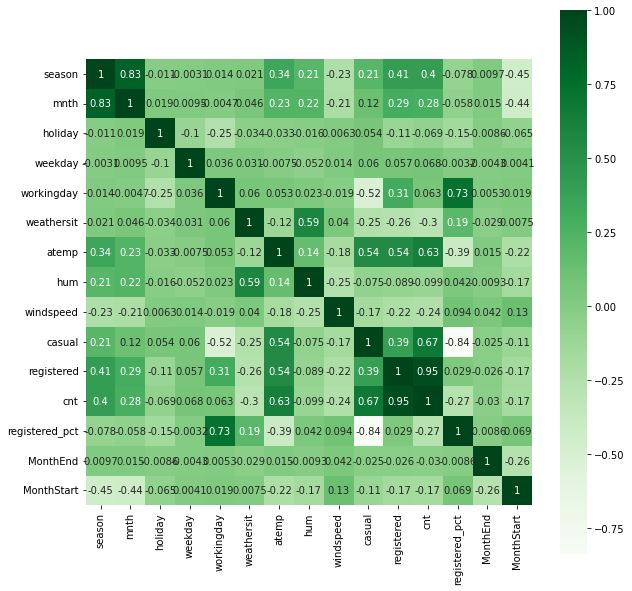

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(bs.corr(), annot = True, cmap="Greens", square= True)
plt.show()

In [26]:
bs.corr()['cnt'].abs().sort_values(ascending=False)

cnt               1.000000
registered        0.945411
casual            0.672123
atemp             0.630685
season            0.404584
weathersit        0.295929
mnth              0.278191
registered_pct    0.273688
windspeed         0.235132
MonthStart        0.174724
hum               0.098543
holiday           0.068764
weekday           0.067534
workingday        0.062542
MonthEnd          0.029831
Name: cnt, dtype: float64

We can drop `registered` and `casual` colums becasue `registered_pct` gives better corelation with recpect to users

In [27]:
bs = bs.drop(['registered', 'casual'], axis=1)
bs.head()

season  mnth  holiday  weekday  workingday  weathersit     atemp  \
0         1     1        0        6           0           2  18.18125   
31        1     2        0        2           1           2  11.72650   
59        1     3        0        2           1           1  13.19395   
90        2     4        0        5           1           2  14.17270   
120       2     5        0        0           0           2  22.41020   

         hum  windspeed   cnt  registered_pct  MonthEnd  MonthStart  
0    80.5833  10.749882   985       66.395939         0           1  
31   82.9565   3.565271  1360       96.544118         0           1  
59   53.5000  14.500475  1851       92.598595         0           1  
90   68.6250  17.333436  2227       86.214639         0           1  
120  76.2083   7.125718  3351       66.039988         0           1

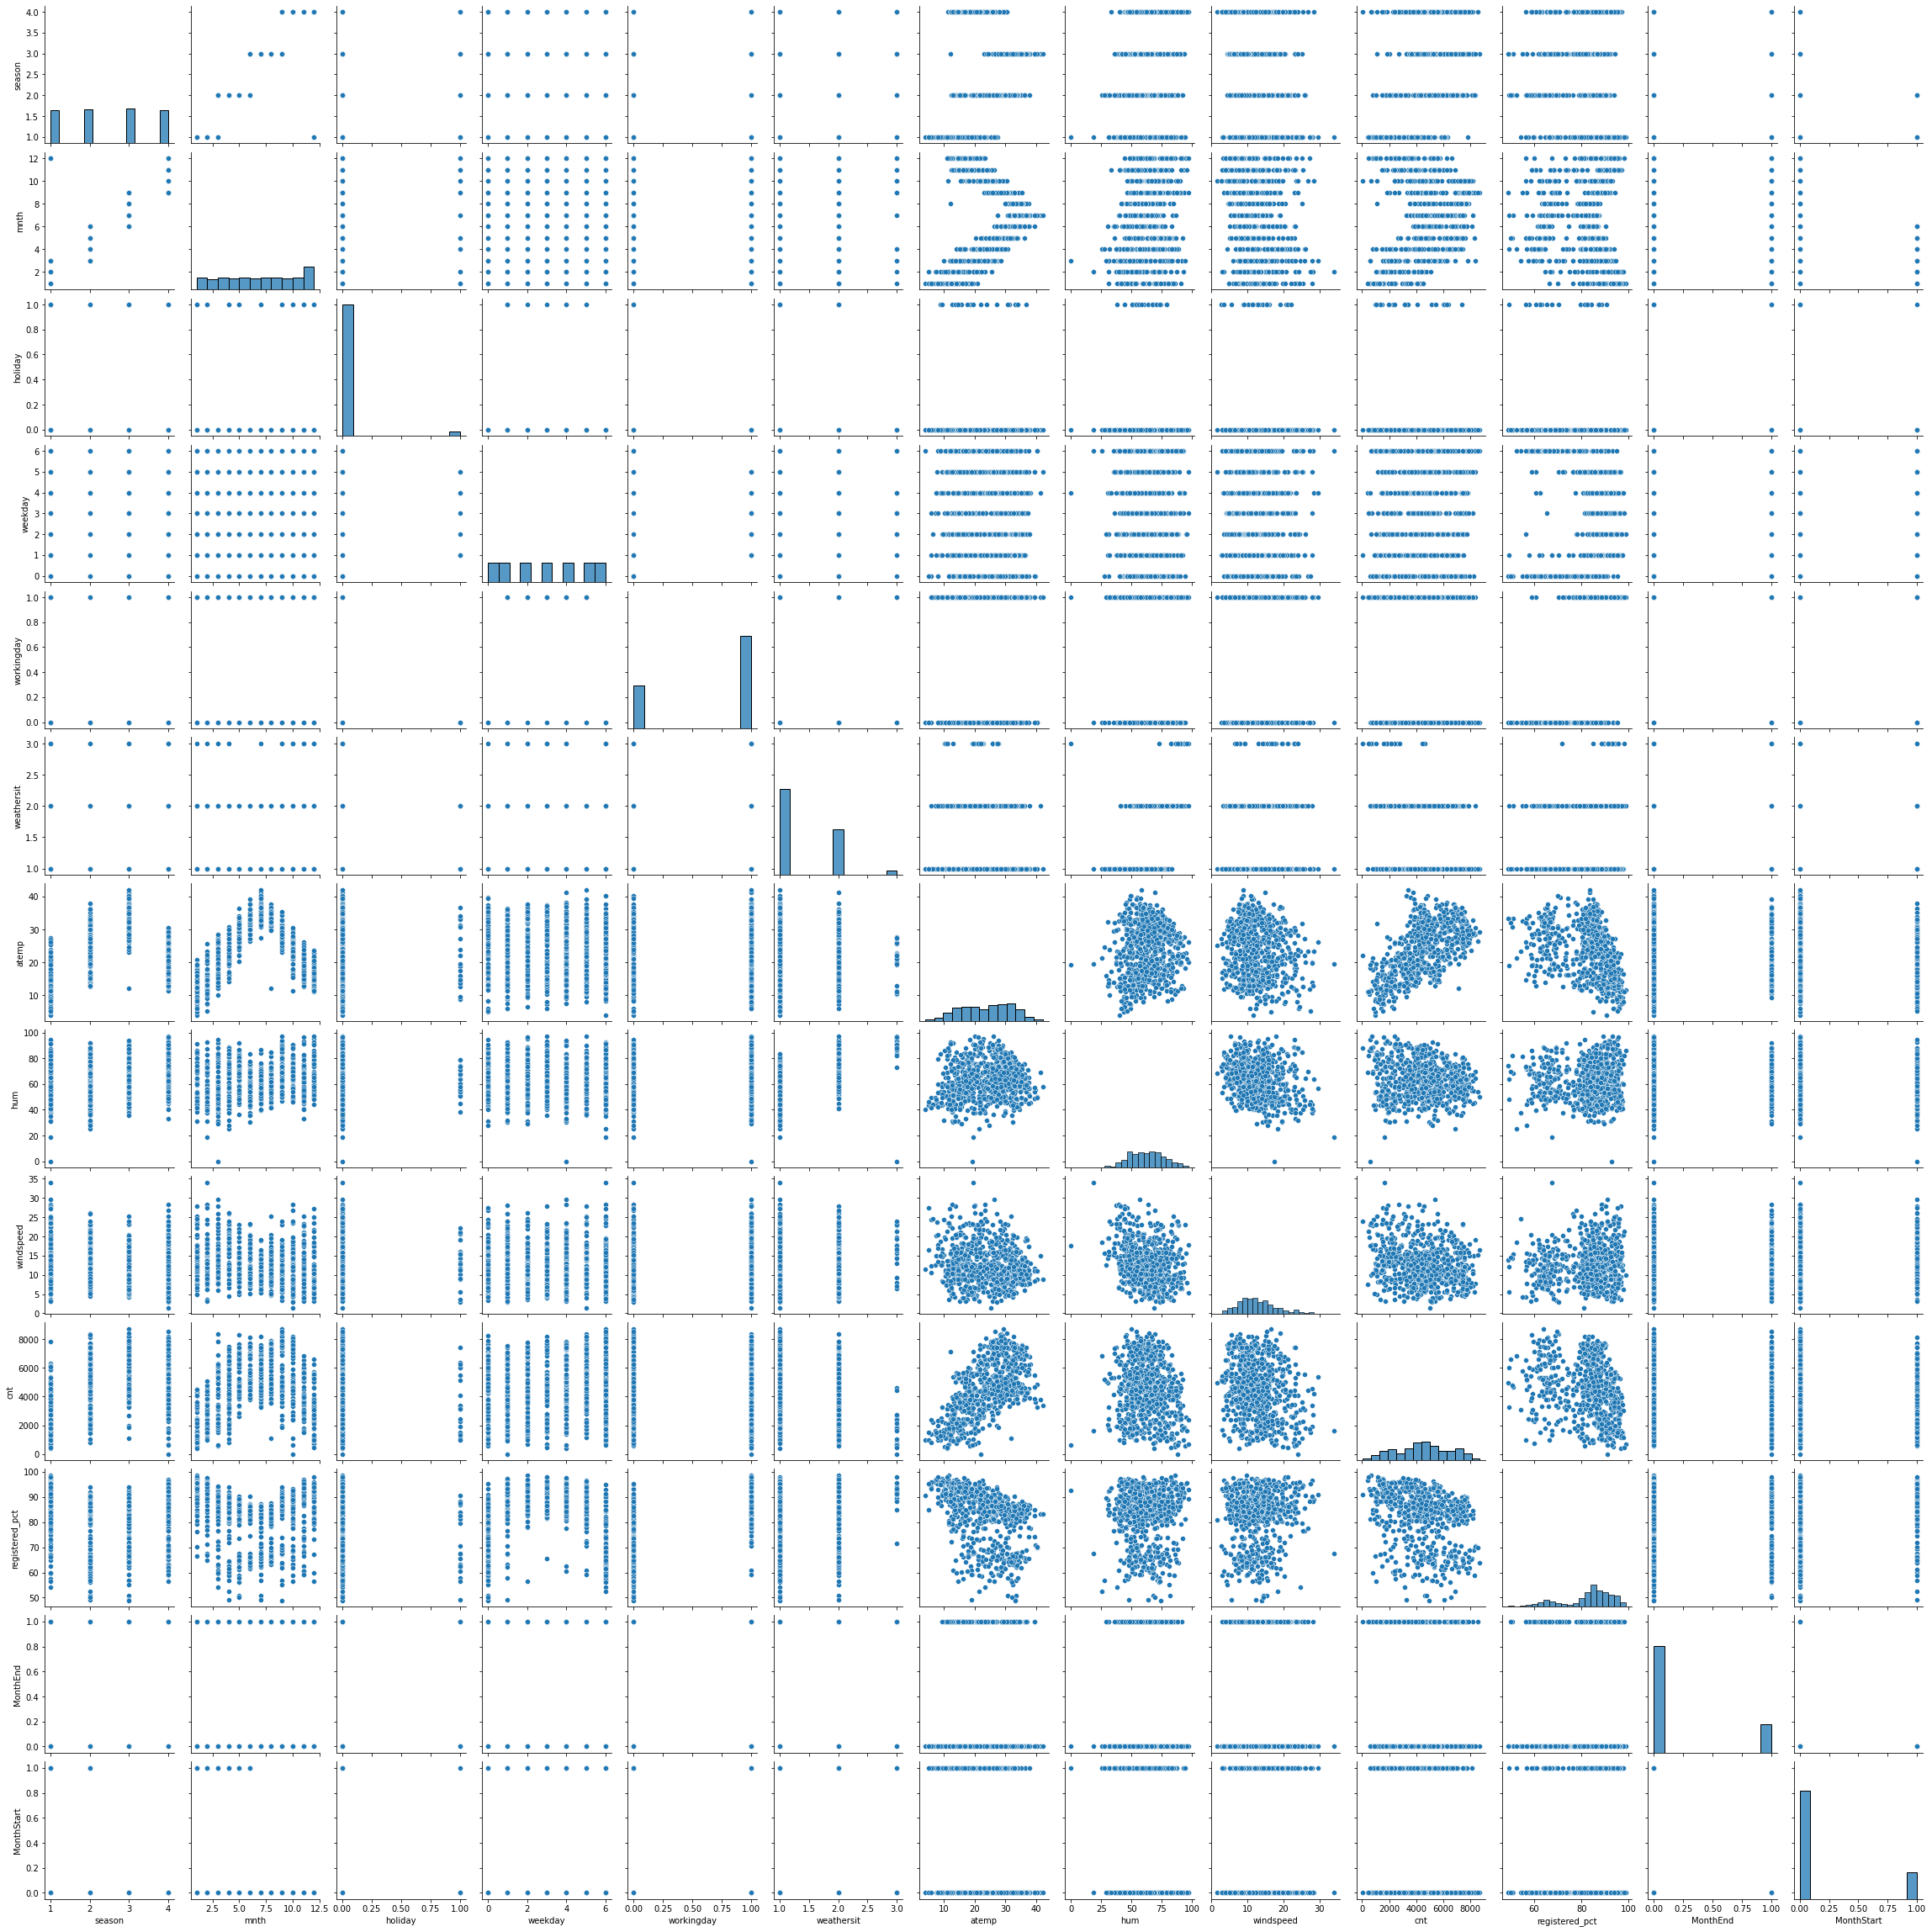

In [28]:
sns.pairplot(data=bs)
plt.show()

In [29]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    int64  
 1   mnth            730 non-null    int64  
 2   holiday         730 non-null    int64  
 3   weekday         730 non-null    int64  
 4   workingday      730 non-null    int64  
 5   weathersit      730 non-null    int64  
 6   atemp           730 non-null    float64
 7   hum             730 non-null    float64
 8   windspeed       730 non-null    float64
 9   cnt             730 non-null    int64  
 10  registered_pct  730 non-null    float64
 11  MonthEnd        730 non-null    int64  
 12  MonthStart      730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 96.0 KB


Here we are considering `cnt` as independent variable lets try plotting scatter plot for `cnt` only for better view of the data spread

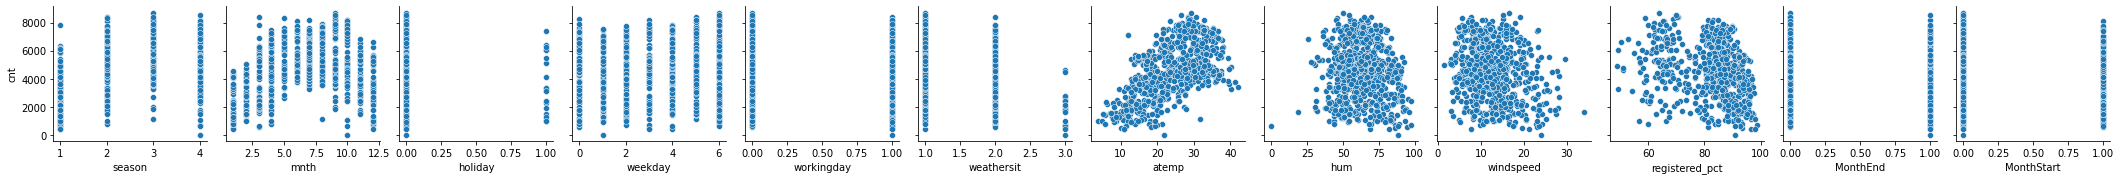

In [30]:
sns.pairplot(
    bs,
    y_vars=["cnt"],
    x_vars=["season", "mnth", "holiday", "weekday", "workingday", "weathersit", "atemp", "hum", "windspeed", "registered_pct", "MonthEnd", "MonthStart"],
)

In [31]:
bs.corr()['cnt'].abs().sort_values(ascending=False)

cnt               1.000000
atemp             0.630685
season            0.404584
weathersit        0.295929
mnth              0.278191
registered_pct    0.273688
windspeed         0.235132
MonthStart        0.174724
hum               0.098543
holiday           0.068764
weekday           0.067534
workingday        0.062542
MonthEnd          0.029831
Name: cnt, dtype: float64

<AxesSubplot:xlabel='atemp', ylabel='cnt'>

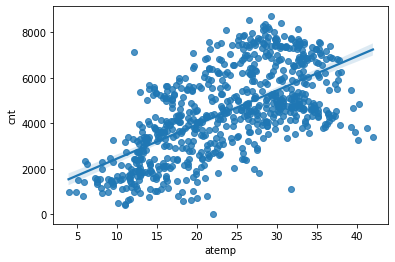

In [32]:
sns.regplot(x='atemp', y='cnt', data=bs)

<div class="alert alert-block alert-info">
<b>Observation:</b> 
From above correlation graphs and corelation data, there is linear relation between `cnt` and `atemp`. 
</div>

## Step 2: Preparing the data for modelling

### Train - Test split

In [33]:
from sklearn.model_selection import train_test_split
bs_train, bs_test = train_test_split(bs, train_size=0.7, random_state=100)
print(bs_train.shape)
print(bs_test.shape)

(510, 13)
(220, 13)


### Rescalling
For scalling we want to sacle only continous variables

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_var = ['atemp', 'hum', 'windspeed', 'cnt', 'registered_pct']
bs_train[num_var] = scaler.fit_transform(bs_train[num_var])
bs_train.head()

season  mnth  holiday  weekday  workingday  weathersit     atemp  \
576       3     7        0        2           1           1  0.766351   
426       1     3        0        6           0           2  0.438975   
728       1    12        0        0           0           1  0.200348   
482       2     4        0        6           0           2  0.391735   
111       2     4        0        5           1           2  0.318819   

          hum  windspeed       cnt  registered_pct  MonthEnd  MonthStart  
576  0.725633   0.294871  0.827658        0.755608         1           0  
426  0.640189   0.285911  0.465255        0.551611         0           1  
728  0.498067   0.676936  0.204096        0.617165         1           0  
482  0.504508   0.221789  0.482973        0.490432         1           0  
111  0.751824   0.406392  0.191095        0.814149         0           0

In [35]:
bs_train.describe()

season        mnth     holiday     weekday  workingday  weathersit  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     2.503922    6.501961    0.027451    3.039216    0.682353    1.405882   
std      1.126125    3.513515    0.163554    2.003541    0.466018    0.544633   
min      1.000000    1.000000    0.000000    0.000000    0.000000    1.000000   
25%      1.000000    3.000000    0.000000    1.000000    0.000000    1.000000   
50%      3.000000    6.500000    0.000000    3.000000    1.000000    1.000000   
75%      4.000000   10.000000    0.000000    5.000000    1.000000    2.000000   
max      4.000000   12.000000    1.000000    6.000000    1.000000    3.000000   

            atemp         hum   windspeed         cnt  registered_pct  \
count  510.000000  510.000000  510.000000  510.000000      510.000000   
mean     0.506651    0.647147    0.347588    0.512546        0.680474   
std      0.214805    0.147853    0.162618    0.226379        0.214657   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.321773    0.535208    0.229825    0.350437        0.607933   
50%      0.516882    0.650064    0.322448    0.520364        0.730546   
75%      0.681605    0.753327    0.434480    0.686666        0.832118   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

         MonthEnd  MonthStart  
count  510.000000  510.000000  
mean     0.201961    0.211765  
std      0.401857    0.408960  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      0.000000    0.000000  
max      1.000000    1.000000

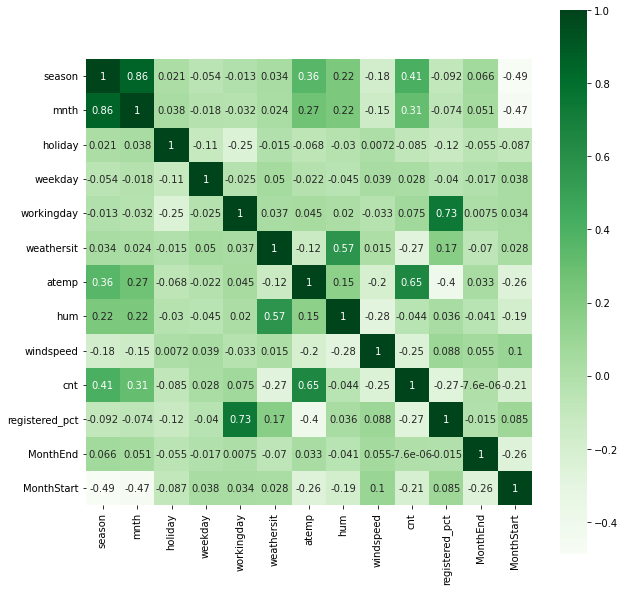

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(bs_train.corr(), annot = True, cmap="Greens", square= True)
plt.show()

In [37]:
bs_train.corr()['cnt'].abs().sort_values(ascending=False)

cnt               1.000000
atemp             0.651845
season            0.409215
mnth              0.311744
weathersit        0.273651
registered_pct    0.269526
windspeed         0.247485
MonthStart        0.212554
holiday           0.084927
workingday        0.074525
hum               0.043590
weekday           0.028084
MonthEnd          0.000008
Name: cnt, dtype: float64

In [38]:
bs_corr = pd.DataFrame(bs_train.corr()['cnt'].abs().sort_values(ascending=False))
bs_corr = bs_corr.rename_axis('Features')
bs_corr = pd.merge(bs_corr, pd.DataFrame(bs.corr()['cnt'].abs().sort_values(ascending=False)).rename_axis('Features'),on = 'Features')
bs_corr

cnt_x     cnt_y
Features                          
cnt             1.000000  1.000000
atemp           0.651845  0.630685
season          0.409215  0.404584
mnth            0.311744  0.278191
weathersit      0.273651  0.295929
registered_pct  0.269526  0.273688
windspeed       0.247485  0.235132
MonthStart      0.212554  0.174724
holiday         0.084927  0.068764
workingday      0.074525  0.062542
hum             0.043590  0.098543
weekday         0.028084  0.067534
MonthEnd        0.000008  0.029831

In [39]:
ytrain = bs_train.pop('cnt')
Xtrain = bs_train

In [40]:
ytrain.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [41]:
Xtrain.head()

season  mnth  holiday  weekday  workingday  weathersit     atemp  \
576       3     7        0        2           1           1  0.766351   
426       1     3        0        6           0           2  0.438975   
728       1    12        0        0           0           1  0.200348   
482       2     4        0        6           0           2  0.391735   
111       2     4        0        5           1           2  0.318819   

          hum  windspeed  registered_pct  MonthEnd  MonthStart  
576  0.725633   0.294871        0.755608         1           0  
426  0.640189   0.285911        0.551611         0           1  
728  0.498067   0.676936        0.617165         1           0  
482  0.504508   0.221789        0.490432         1           0  
111  0.751824   0.406392        0.814149         0           0

## Step 3: Training the model
We will start of with automated RFE model and then start manually analyzing the data

### RFE method
In RFE method lets start with 9 features, `cnt` has very low corelation with `MonthEnd` `weekday` `hum`
Also `hum` can be explained by `weathersit` 
`MonthEnd` and `weekday` has very low corelation with all other varaibles.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lr = LinearRegression()
lr.fit(Xtrain, ytrain)
rfe = RFE(lr,n_features_to_select=9)
rfe = rfe.fit(Xtrain, ytrain)

In [43]:
pd.DataFrame(list(zip(Xtrain.columns, rfe.support_,rfe.ranking_)))

0      1  2
0           season   True  1
1             mnth  False  4
2          holiday   True  1
3          weekday  False  3
4       workingday   True  1
5       weathersit   True  1
6            atemp   True  1
7              hum   True  1
8        windspeed   True  1
9   registered_pct   True  1
10        MonthEnd   True  1
11      MonthStart  False  2

`mnth`, `weekday` and `MonthStart` are dropped, Looking at the box plots above, These variables dont have much change in `cnt`

In [44]:
col = Xtrain.columns[rfe.support_]
col

Index(['season', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum',
       'windspeed', 'registered_pct', 'MonthEnd'],
      dtype='object')

### Manual elimenation of features
- Lets start doing more detailed analysis of the model using more statical library.
- We will start with all the features in `col` and then start removing each feature and analyze differnt parameters

We will be using p-value and VIF as our guode to see which feature to remove and R-sqaured and Adj; R-squared to see how good the model is

#### Order of removing variables
- High p-value, high VIF
- High p-value, low VIF
        This might remove variables that explain other variables, Which brings the VIF of other independednt variable down.
- Low p-value, High VIF

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF_vs_pValue(model, training_data):
    p_value = pd.DataFrame(model.pvalues)
    p_value = p_value.rename_axis('Features')
    p_value = p_value.rename(columns={p_value.columns[0]: 'p_value'})
    p_value['p_value'] = round(p_value['p_value'], 3)
    p_value = p_value.sort_values(by = 'p_value', ascending=False)
    
    vif = pd.DataFrame()
    vif['Features'] = training_data.columns
    vif['VIF'] = [variance_inflation_factor(training_data.values, i) for i in range(training_data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = pd.merge(vif, p_value,on = 'Features')
    vif = vif.sort_values(by = ['VIF','p_value'], ascending=False)
    print(vif)

In [68]:
import statsmodels.api as sm
def manualRFE(X,y):
    X_ = sm.add_constant(X)
    lrm = sm.OLS(y, X_).fit()
    print(lrm.summary())
    VIF_vs_pValue(lrm, X_)
    return lrm, X_

In [49]:
manualRFE(Xtrain[col], ytrain)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     64.56
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           4.85e-78
Time:                        23:32:32   Log-Likelihood:                 231.09
No. Observations:                 510   AIC:                            -442.2
Df Residuals:                     500   BIC:                            -399.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4474      0.055      8.

<div class="alert alert-block alert-info">
<b>Observation:</b> Model 1:
    
    Using Features `season`, `holiday`, `workingday`, `weathersit`, `atemp`, `hum`, `windspeed`, `registered_pct`, `MonthEnd`
    R-squared: 0.537
    Adj. R-squared: 0.529
    AIC: -442.2
    BIC: -399.8
    atemp(+ve), Humidity(-ve), windspeed(-ve), registered_pct(-ve) have the biggest coeffcients here.
    
    Looking at p-values there are couple of variables with high pvalues, lets elminate one of the features `holiday`
</div>

In [50]:
col_2 = col.drop('holiday')
manualRFE(Xtrain[col_2], ytrain)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     72.23
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.50e-78
Time:                        23:32:48   Log-Likelihood:                 230.06
No. Observations:                 510   AIC:                            -442.1
Df Residuals:                     501   BIC:                            -404.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4429      0.055      7.

<div class="alert alert-block alert-info">
<b>Observation:</b> Model 2:
    
    Using Features `season`, `workingday`, `weathersit`, `atemp`, `hum`, `windspeed`, `registered_pct`, `MonthEnd`
    R-squared: 0.536
    Adj. R-squared: 0.528
    AIC: -442.1
    BIC: -404.0
    
    Very little drop in Adj R-squared so dropping `holiday` has no effect on the model
    
    atemp(+ve), Humidity(-ve), windspeed(-ve), registered_pct(-ve) have the biggest coeffcients here.
    
    Looking at p-values there is only variables with high pvalue, lets elminate one of the features `MonthEnd`
</div>

In [51]:
col_3 = col_2.drop('MonthEnd')
manualRFE(Xtrain[col_3], ytrain)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     82.12
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           4.11e-79
Time:                        23:33:06   Log-Likelihood:                 229.08
No. Observations:                 510   AIC:                            -442.2
Df Residuals:                     502   BIC:                            -408.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4393      0.055      7.

<div class="alert alert-block alert-info">
<b>Observation:</b> Model 3:
    
    Using Features `season`, `workingday`, `weathersit`, `atemp`, `hum`, `windspeed`, `registered_pct`
    R-squared: 0.534
    Adj. R-squared: 0.527
    AIC: -442.2
    BIC: -408.3
    
    Very little drop in Adj R-squared so dropping `MonthEnd` has no effect on the model
    
    atemp(+ve), Humidity(-ve), windspeed(-ve), registered_pct(-ve) have the biggest coeffcients here.
    
    Looking at p-values and VIF `registered_pct` has highest VIF and border line p-value. Lets try to eliminate this and see how it effects the model
</div>

In [52]:
col_4 = col_3.drop('registered_pct')
manualRFE(Xtrain[col_4], ytrain)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     94.43
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           3.57e-79
Time:                        23:38:00   Log-Likelihood:                 226.85
No. Observations:                 510   AIC:                            -439.7
Df Residuals:                     503   BIC:                            -410.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3693      0.044      8.322      0.0

<div class="alert alert-block alert-info">
<b>Observation:</b> Model 4:
    
    Using Features `season`, `workingday`, `weathersit`, `atemp`, `hum`, `windspeed`
    R-squared: 0.530
    Adj. R-squared: 0.524
    AIC: -439.7
    BIC: -410.1
    
    Very little drop in Adj R-squared so dropping `registered_pct` has no effect on the model
    
    atemp(+ve), Humidity(-ve), windspeed(-ve) have the biggest coeffcients here.
    
    Intresting observation here is removing `registered_pct` increased the p-value of `workingday`. Let's remove `workingday` test the model and see if we want to add back `registered_pct` or not.
</div>

In [53]:
col_5 = col_4.drop('workingday')
manualRFE(Xtrain[col_5], ytrain)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     112.1
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.67e-79
Time:                        23:42:57   Log-Likelihood:                 225.17
No. Observations:                 510   AIC:                            -438.3
Df Residuals:                     504   BIC:                            -412.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3875      0.043      8.941      0.0

<div class="alert alert-block alert-info">
<b>Observation:</b> Model 5:
    
    Using Features `season`, `weathersit`, `atemp`, `hum`, `windspeed`
    R-squared: 0.527
    Adj. R-squared: 0.522
    AIC: -438.3
    BIC: -412.9
    
    Very little drop in Adj R-squared so dropping `workingday` has no effect on the model
    
    atemp(+ve), Humidity(-ve), windspeed(-ve) have the biggest coeffcients here.
    
    Let's try to add `registered_pct` back and see how it effects the model.
</div>

In [58]:
col_6 = col_3.drop('workingday')
manualRFE(Xtrain[col_6], ytrain)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     93.30
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.76e-78
Time:                        23:52:08   Log-Likelihood:                 225.22
No. Observations:                 510   AIC:                            -436.4
Df Residuals:                     503   BIC:                            -406.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3783      0.051      7.

<div class="alert alert-block alert-info">
<b>Observation:</b> Model 6:
    
    Using Features `season`, `weathersit`, `atemp`, `hum`, `windspeed`, registered_pct
    R-squared: 0.527
    Adj. R-squared: 0.521
    AIC: -436.4
    BIC: -406.8
    
    Very little drop in Adj R-squared so dropping `workingday` has no effect on the model
    
    atemp(+ve), Humidity(-ve), windspeed(-ve) have the biggest coeffcients here.
    
    Adding `registered_pct` is only exposing unstability with very high value. So we will not be adding `registered_pct` back to the model
</div>

<div class="alert alert-block alert-success">
<b>Observation:</b> Final Model:
    
    Model 5 will be the final model we will be going foword with the Resdual analysis.
    
    Using Features `season`, `weathersit`, `atemp`, `hum`, `windspeed`
    R-squared: 0.527
    Adj. R-squared: 0.522
    AIC: -438.3
    BIC: -412.9
    
    Very little drop in Adj R-squared so dropping `workingday` has no effect on the model
    
    atemp(+ve), Humidity(-ve), windspeed(-ve) have the biggest coeffcients here.
</div>

$$
y = 0.3875 + 0.0452 * season + (-0.0541) * weathersit + 0.5808 * atemp + (-0.2182) * hum + (-0.1879) * windspeed
$$


In [84]:
final_lrm_model, Xtrain_sm = manualRFE(Xtrain[col_5], ytrain)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     112.1
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           1.67e-79
Time:                        00:12:43   Log-Likelihood:                 225.17
No. Observations:                 510   AIC:                            -438.3
Df Residuals:                     504   BIC:                            -412.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3875      0.043      8.941      0.0

## Step 4: Resdual analysis

$ Resudal = (y_{train} - y_{predict})$

<AxesSubplot:ylabel='Density'>

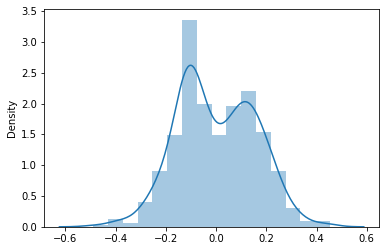

In [85]:
resudal = ytrain - final_lrm_model.predict(Xtrain_sm)
sns.distplot(resudal)

In [83]:
resudal.describe().apply(lambda x: f"{x:0.3f}")

count    510.000
mean       0.000
std        0.155
min       -0.497
25%       -0.113
50%       -0.012
75%        0.118
max        0.474
dtype: object

## Step 5: Predection and evaluation on the test set

### Predction

### Evaluation

## Step 6: Observations, Conclusions and Suggestions

### Observations

### Conclusions

### Suggestions